In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import cartopy.crs as ccrs
import numpy as np
import scipy.stats as sts
from sqlalchemy import create_engine

In [2]:
biden_csv_path = "hashtag_joebiden.csv"

In [3]:
biden_df = pd.read_csv(biden_csv_path, delimiter = ',', lineterminator='\n')


In [4]:
biden_df.head()


,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [5]:
biden_data_df = biden_df[['created_at', 'tweet', 'likes', 'retweet_count', 'source','user_location', 'lat', 'long', 'city','state','state_code','country']]
biden_data_df.head()

,created_at,tweet,likes,retweet_count,source,user_location,lat,long,city,state,state_code,country
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,Florida,FL,United States of America
1,2020-10-15 00:00:18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,Golden Valley Arizona,46.304036,-109.171431,NaN,Montana,MT,United States of America
3,2020-10-15 00:00:21,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,"California, USA",36.701463,-118.755997,NaN,California,CA,United States of America


In [6]:
str_cols = ['user_location', 'city', 'state', 'state_code', 'country']
biden_data_df.loc[:, 'lat'] = biden_data_df.loc[:, 'lat'].fillna(91)
biden_data_df.loc[:, 'long'] = biden_data_df.loc[:, 'long'].fillna(181)
biden_data_df.loc[:, str_cols] = biden_data_df.loc[:, str_cols].fillna("Not Provided")
biden_data_df.head()

C:\Users\15037\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,created_at,tweet,likes,retweet_count,source,user_location,lat,long,city,state,state_code,country
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,Not Provided,Florida,FL,United States of America
1,2020-10-15 00:00:18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,Not Provided,91.000000,181.000000,Not Provided,Not Provided,Not Provided,Not Provided
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,Golden Valley Arizona,46.304036,-109.171431,Not Provided,Montana,MT,United States of America
3,2020-10-15 00:00:21,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,Not Provided,91.000000,181.000000,Not Provided,Not Provided,Not Provided,Not Provided
4,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,"California, USA",36.701463,-118.755997,Not Provided,California,CA,United States of America


In [7]:
biden_data_df = biden_data_df.loc[(biden_data_df['country'] == "United States of America") & (biden_data_df['long'] < 100),:]
biden_data_df

,created_at,tweet,likes,retweet_count,source,user_location,lat,long,city,state,state_code,country
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,Not Provided,Florida,FL,United States of America
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,Golden Valley Arizona,46.304036,-109.171431,Not Provided,Montana,MT,United States of America
4,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,"California, USA",36.701463,-118.755997,Not Provided,California,CA,United States of America
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,"Chicago, Illinois",41.875562,-87.624421,Chicago,Illinois,IL,United States of America
11,2020-10-15 00:00:57,"FBI Allegedly Obtained Hunter Biden Computer, ...",0.0,0.0,Twitter for Android,"Kentucky, USA",37.572603,-85.155141,Not Provided,Kentucky,KY,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...
776861,2020-11-08 23:58:09,#election #2020Elections #trump #biden https:/...,0.0,0.0,Twitter for iPhone,"New York, USA",40.712728,-74.006015,New York,New York,NY,United States of America
776862,2020-11-08 23:58:10,@GOP @GOPLeader @senatemajldr @LindseyGrahamSC...,0.0,0.0,Twitter for Android,"Cape Cod, MA",41.798807,-69.996014,Not Provided,Massachusetts,MA,United States of America
776865,2020-11-08 23:58:24,@FLOTUS I’m excited to have a FLOTUS whose vag...,0.0,0.0,Twitter for iPhone,"Washington, DC",38.894992,-77.036558,Washington,District of Columbia,DC,United States of America
776870,2020-11-08 23:58:48,The man needs some help...#usa #biden\nWhen wi...,0.0,0.0,Twitter for Android,Earth. 3rd Planet from Sun.,43.519630,-114.315320,Not Provided,Idaho,ID,United States of America


In [8]:
biden_likes = biden_data_df['likes']
biden_retweet_count = biden_data_df['retweet_count']

In [9]:
# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(biden_likes)
print(f"The mean number of hashtag trump tweet likes is {mean_numpy}")

median_numpy = np.median(biden_likes)
print(f"The median number of hashtag trump tweet likes is {median_numpy}")

mode_scipy = sts.mode(biden_likes)
print(f"The mode of hashtag trump tweet likes is {mode_scipy}")

The mean number of hashtag trump tweet likes is 13.702083468975845
The median number of hashtag trump tweet likes is 0.0
The mode of hashtag trump tweet likes is ModeResult(mode=array([0.]), count=array([83194]))


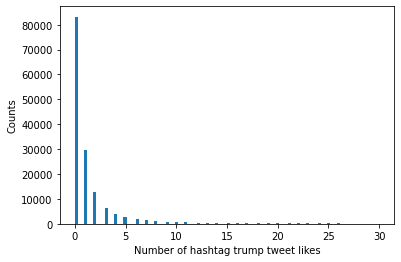

In [10]:
# Characterize the data set using matplotlib
plt.hist(biden_likes, bins=100, range = [0,30])
plt.xlabel('Number of hashtag trump tweet likes')
plt.ylabel('Counts')
plt.show()

In [11]:
# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(biden_retweet_count)
print(f"The mean number of hashtag trump retweets is {mean_numpy}")

median_numpy = np.median(biden_retweet_count)
print(f"The median number of hashtag trump retweets is {median_numpy}")

mode_scipy = sts.mode(biden_retweet_count)
print(f"The mode of hashtag trump retweets is {mode_scipy}")

The mean number of hashtag trump retweets is 3.1088352106256916
The median number of hashtag trump retweets is 0.0
The mode of hashtag trump retweets is ModeResult(mode=array([0.]), count=array([121410]))


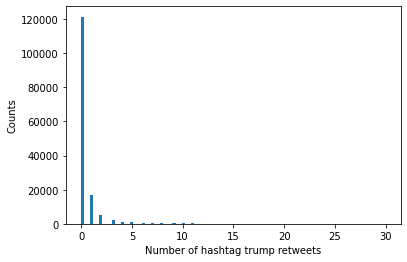

In [12]:
# Characterize the data set using matplotlib
plt.hist(biden_retweet_count, bins=100, range = [0,30])
plt.xlabel('Number of hashtag trump retweets')
plt.ylabel('Counts')
plt.show()

source
Agencychecklists            1
AgoraPulse Manager         37
AiTrivia Quiz Questions     9
Airtime Pro                 6
Amplifr                     2
                           ..
iOS                         3
newsy.co                    2
talktunesworld              1
talktvworld                 1
Оwly                        6
Name: source, Length: 185, dtype: int64

C:\Users\15037\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15037\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12390 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15037\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15037\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12502 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15037\AppData\Roaming\Python\Python36\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12525 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\15037\AppData\Roaming\Pyth

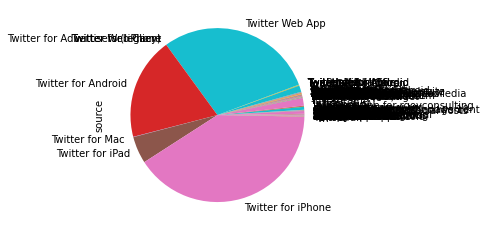

<Figure size 432x288 with 0 Axes>

country
United States of America    153590
Name: country, dtype: int64

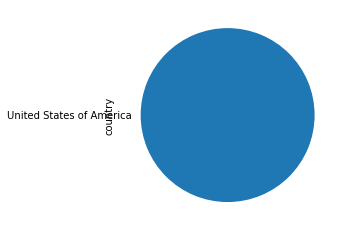

<Figure size 432x288 with 0 Axes>

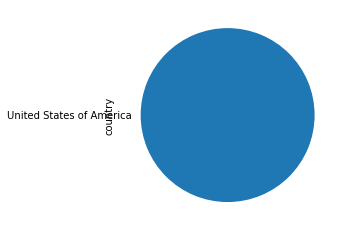

<Figure size 432x288 with 0 Axes>

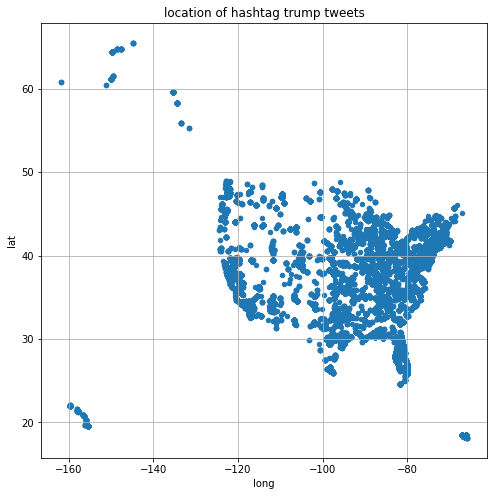

In [18]:
test = biden_data_df.plot(kind="scatter", x="long", y="lat", grid=True, figsize=(8,8),
              title="location of hashtag biden tweets")

In [19]:
# using naive method to get count  
# counting #'s
biden_tweets = biden_data_df['tweet']
hashtag_count = []

for tweet in biden_tweets:
    
    count = 0
  
    for i in tweet: 
        if i == '#': 
            count = count + 1
    hashtag_count.append(count)
        
hashtag_count

[8,
 2,
 6,
 6,
 2,
 11,
 4,
 4,
 4,
 1,
 4,
 1,
 11,
 5,
 5,
 1,
 1,
 1,
 5,
 3,
 1,
 1,
 5,
 1,
 5,
 7,
 1,
 1,
 4,
 4,
 8,
 4,
 4,
 3,
 5,
 7,
 3,
 1,
 4,
 2,
 1,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 1,
 1,
 4,
 5,
 3,
 1,
 4,
 4,
 1,
 1,
 9,
 3,
 2,
 4,
 1,
 1,
 4,
 2,
 3,
 2,
 1,
 4,
 1,
 2,
 7,
 14,
 18,
 1,
 2,
 2,
 4,
 6,
 12,
 9,
 1,
 1,
 2,
 2,
 6,
 1,
 2,
 3,
 3,
 1,
 7,
 6,
 3,
 5,
 3,
 2,
 2,
 8,
 4,
 1,
 3,
 13,
 5,
 4,
 3,
 1,
 1,
 5,
 2,
 8,
 4,
 5,
 1,
 6,
 6,
 2,
 6,
 4,
 3,
 6,
 4,
 9,
 7,
 8,
 4,
 3,
 3,
 2,
 5,
 1,
 1,
 3,
 8,
 1,
 1,
 1,
 5,
 1,
 2,
 2,
 5,
 2,
 2,
 2,
 22,
 2,
 1,
 7,
 4,
 1,
 2,
 3,
 3,
 11,
 4,
 3,
 3,
 4,
 4,
 4,
 10,
 6,
 1,
 2,
 5,
 4,
 5,
 5,
 2,
 3,
 5,
 5,
 8,
 1,
 1,
 5,
 2,
 4,
 4,
 1,
 2,
 2,
 4,
 1,
 2,
 8,
 1,
 6,
 7,
 4,
 3,
 4,
 6,
 3,
 1,
 4,
 19,
 4,
 6,
 5,
 3,
 1,
 12,
 1,
 4,
 3,
 12,
 5,
 6,
 4,
 2,
 6,
 10,
 6,
 1,
 3,
 6,
 3,
 2,
 1,
 3,
 3,
 5,
 1,
 2,
 1,
 5,
 4,
 1,
 3,
 4,
 6,
 3,
 1,
 10,
 2,
 3,
 1,
 3,
 1,
 2,
 1,
 3,
 5,
 8

In [20]:
# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(hashtag_count)
print(f"The mean number of hashtags in a tweet is {mean_numpy}")

median_numpy = np.median(hashtag_count)
print(f"The median number of hashtags in a tweet is {median_numpy}")

mode_scipy = sts.mode(hashtag_count)
print(f"The mode of hashtags in a tweet is {mode_scipy}")

The mean number of hashtags in a tweet is 4.175245784230744
The median number of hashtags in a tweet is 3.0
The mode of hashtags in a tweet is ModeResult(mode=array([2]), count=array([30898]))


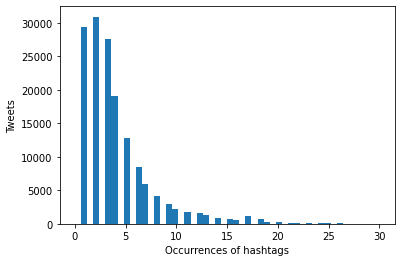

In [21]:
# Characterize the data set using matplotlib
plt.hist(hashtag_count, bins=50, range = [0,30])
plt.xlabel('Occurrences of hashtags')
plt.ylabel('Tweets')
plt.show()

In [22]:
d = {"hashtag_count" : hashtag_count, "likes" : biden_likes}
df = pd.DataFrame(d)
df

,hashtag_count,likes
0,8,0.0
2,2,0.0
4,6,1.0
6,6,0.0
11,2,0.0
...,...,...
776861,4,0.0
776862,2,0.0
776865,1,0.0
776870,2,0.0


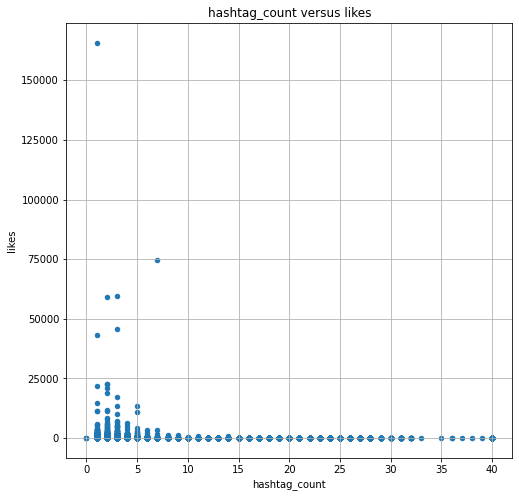

In [23]:
test = df.plot(kind="scatter", x="hashtag_count", y="likes", grid=True, figsize=(8,8),
              title="hashtag_count versus likes")

In [24]:
d = {"hashtag_count" : hashtag_count, "retweet_count" : biden_retweet_count}
df = pd.DataFrame(d)
df

,hashtag_count,retweet_count
0,8,0.0
2,2,0.0
4,6,0.0
6,6,0.0
11,2,0.0
...,...,...
776861,4,0.0
776862,2,0.0
776865,1,0.0
776870,2,0.0


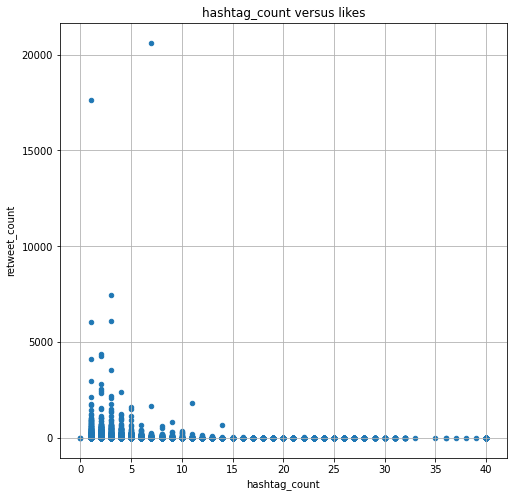

In [25]:
test = df.plot(kind="scatter", x="hashtag_count", y="retweet_count", grid=True, figsize=(8,8),
              title="hashtag_count versus likes")

In [26]:
word = ''
word += 'a'
print(word)

a


In [27]:
words_in_tweets = []
unique_words = []
unique_word_counts = []

for tweet in biden_tweets:
    
    tweet += ' '
    words = []
    j = ''
    
    for i in tweet: 
        if (j in ['#']) & (i not in [' ','\n','.','!',':',',','?','’']):
            word += i
        elif j in ['#']:
            words.append(word)
            if word not in unique_words:
                unique_words.append(word)
                unique_word_counts.append(1)
            else:
                index = unique_words.index(word)
                unique_word_counts[index] = unique_word_counts[index] + 1
            word = ''
            j = ''
        else:
            j = i
    words_in_tweets.append(words)

In [28]:
biden_data_df

,created_at,tweet,likes,retweet_count,source,user_location,lat,long,city,state,state_code,country
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,Not Provided,Florida,FL,United States of America
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,Golden Valley Arizona,46.304036,-109.171431,Not Provided,Montana,MT,United States of America
4,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,"California, USA",36.701463,-118.755997,Not Provided,California,CA,United States of America
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,"Chicago, Illinois",41.875562,-87.624421,Chicago,Illinois,IL,United States of America
11,2020-10-15 00:00:57,"FBI Allegedly Obtained Hunter Biden Computer, ...",0.0,0.0,Twitter for Android,"Kentucky, USA",37.572603,-85.155141,Not Provided,Kentucky,KY,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...
776861,2020-11-08 23:58:09,#election #2020Elections #trump #biden https:/...,0.0,0.0,Twitter for iPhone,"New York, USA",40.712728,-74.006015,New York,New York,NY,United States of America
776862,2020-11-08 23:58:10,@GOP @GOPLeader @senatemajldr @LindseyGrahamSC...,0.0,0.0,Twitter for Android,"Cape Cod, MA",41.798807,-69.996014,Not Provided,Massachusetts,MA,United States of America
776865,2020-11-08 23:58:24,@FLOTUS I’m excited to have a FLOTUS whose vag...,0.0,0.0,Twitter for iPhone,"Washington, DC",38.894992,-77.036558,Washington,District of Columbia,DC,United States of America
776870,2020-11-08 23:58:48,The man needs some help...#usa #biden\nWhen wi...,0.0,0.0,Twitter for Android,Earth. 3rd Planet from Sun.,43.519630,-114.315320,Not Provided,Idaho,ID,United States of America


In [29]:
len(words_in_tweets)
# trump_data_df.drop('hashtag in tweets', inplace=True, axis=1)
biden_data_df.insert(2, "hashtags in tweets", "Any")


In [30]:
biden_data_df['hashtags in tweets'] = words_in_tweets
biden_data_df

,created_at,tweet,hashtags in tweets,likes,retweet_count,source,user_location,lat,long,city,state,state_code,country
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,"[aElecciones2020, Florida, JoeBiden, DonaldTru...",0.0,0.0,TweetDeck,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,Not Provided,Florida,FL,United States of America
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,"[Biden, TrumpIsNotAmerica]",0.0,0.0,Twitter Web App,Golden Valley Arizona,46.304036,-109.171431,Not Provided,Montana,MT,United States of America
4,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #...,"[censorship, HunterBiden, Biden, BidenEmails, ...",1.0,0.0,Twitter Web App,"California, USA",36.701463,-118.755997,Not Provided,California,CA,United States of America
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...","[NYPost, censorship, CENSORED, JoeBiden, Trump...",0.0,0.0,Twitter for iPhone,"Chicago, Illinois",41.875562,-87.624421,Chicago,Illinois,IL,United States of America
11,2020-10-15 00:00:57,"FBI Allegedly Obtained Hunter Biden Computer, ...","[JoeBiden, HunterBiden]",0.0,0.0,Twitter for Android,"Kentucky, USA",37.572603,-85.155141,Not Provided,Kentucky,KY,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
776861,2020-11-08 23:58:09,#election #2020Elections #trump #biden https:/...,"[election, 2020Elections, trump, biden]",0.0,0.0,Twitter for iPhone,"New York, USA",40.712728,-74.006015,New York,New York,NY,United States of America
776862,2020-11-08 23:58:10,@GOP @GOPLeader @senatemajldr @LindseyGrahamSC...,"[Trump, Biden]",0.0,0.0,Twitter for Android,"Cape Cod, MA",41.798807,-69.996014,Not Provided,Massachusetts,MA,United States of America
776865,2020-11-08 23:58:24,@FLOTUS I’m excited to have a FLOTUS whose vag...,[biden],0.0,0.0,Twitter for iPhone,"Washington, DC",38.894992,-77.036558,Washington,District of Columbia,DC,United States of America
776870,2020-11-08 23:58:48,The man needs some help...#usa #biden\nWhen wi...,"[usa, biden]",0.0,0.0,Twitter for Android,Earth. 3rd Planet from Sun.,43.519630,-114.315320,Not Provided,Idaho,ID,United States of America


In [31]:
n = 44

tweet = biden_data_df.loc[biden_data_df.index[n],['tweet', 'hashtags in tweets']].values[0]
hashtags = biden_data_df.loc[biden_data_df.index[n],['tweet', 'hashtags in tweets']].values[1]

print(f"Tweet: {tweet} \n\n--------------------------------------------------------------------------------------\n\n Hashtag: {hashtags}")

Tweet: @ChrisMegerian how much is the #JoeBiden campaign paying you to ‘try’ to diffuse the #HunterBiden bombshell? 

--------------------------------------------------------------------------------------

 Hashtag: ['JoeBiden', 'HunterBiden']


In [32]:
biden_data_df

,created_at,tweet,hashtags in tweets,likes,retweet_count,source,user_location,lat,long,city,state,state_code,country
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,"[aElecciones2020, Florida, JoeBiden, DonaldTru...",0.0,0.0,TweetDeck,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,Not Provided,Florida,FL,United States of America
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,"[Biden, TrumpIsNotAmerica]",0.0,0.0,Twitter Web App,Golden Valley Arizona,46.304036,-109.171431,Not Provided,Montana,MT,United States of America
4,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #...,"[censorship, HunterBiden, Biden, BidenEmails, ...",1.0,0.0,Twitter Web App,"California, USA",36.701463,-118.755997,Not Provided,California,CA,United States of America
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...","[NYPost, censorship, CENSORED, JoeBiden, Trump...",0.0,0.0,Twitter for iPhone,"Chicago, Illinois",41.875562,-87.624421,Chicago,Illinois,IL,United States of America
11,2020-10-15 00:00:57,"FBI Allegedly Obtained Hunter Biden Computer, ...","[JoeBiden, HunterBiden]",0.0,0.0,Twitter for Android,"Kentucky, USA",37.572603,-85.155141,Not Provided,Kentucky,KY,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
776861,2020-11-08 23:58:09,#election #2020Elections #trump #biden https:/...,"[election, 2020Elections, trump, biden]",0.0,0.0,Twitter for iPhone,"New York, USA",40.712728,-74.006015,New York,New York,NY,United States of America
776862,2020-11-08 23:58:10,@GOP @GOPLeader @senatemajldr @LindseyGrahamSC...,"[Trump, Biden]",0.0,0.0,Twitter for Android,"Cape Cod, MA",41.798807,-69.996014,Not Provided,Massachusetts,MA,United States of America
776865,2020-11-08 23:58:24,@FLOTUS I’m excited to have a FLOTUS whose vag...,[biden],0.0,0.0,Twitter for iPhone,"Washington, DC",38.894992,-77.036558,Washington,District of Columbia,DC,United States of America
776870,2020-11-08 23:58:48,The man needs some help...#usa #biden\nWhen wi...,"[usa, biden]",0.0,0.0,Twitter for Android,Earth. 3rd Planet from Sun.,43.519630,-114.315320,Not Provided,Idaho,ID,United States of America


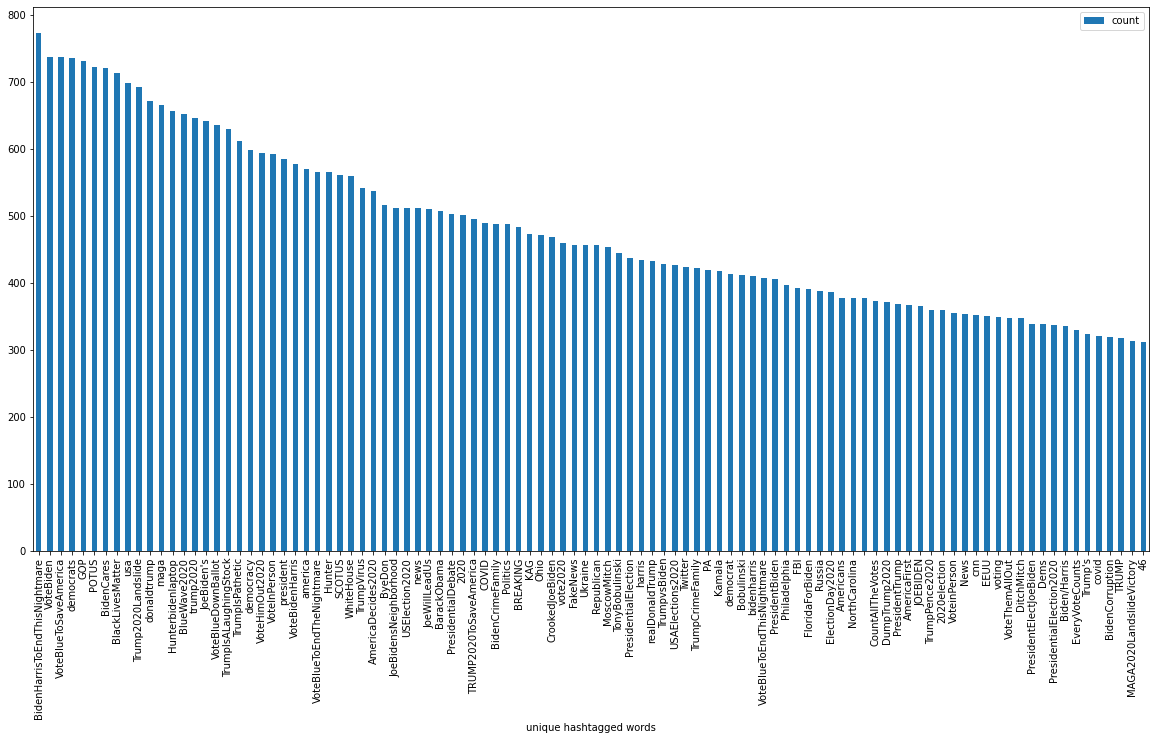

In [38]:
len(words_in_tweets)
d = {"unique hashtagged words" : unique_words, "count" : unique_word_counts}
df = pd.DataFrame(d)
word_count = df.sort_values('count', ascending=False)[100:200]

ax = word_count.plot.bar(x='unique hashtagged words', y='count', rot=90, figsize=(20,10))
plt.show()

In [39]:
pro_biden_hashtags = ['wtpBlue','BidenHarriesToSaveAmerica','BlueWave','voteblue','BidenHarris2020ToSaveAmerica','wtpBiden','VoteBlue','BidenHarris2020Landslide','VoteBidenHarrisToSaveAmerica','VoteBlueToSaveAmerica','VoteBlueDownBallot','BidenCares']
against_biden_hashtags = ['BidenCrimeFamily','HunterBidenEmails','Hunterbidenlaptop','CrookedJoeBiden','BidenCrimeFamily','BidenCorruption','BidenCrimeFamily','SleepyJoe','CorruptJoeBiden','WheresHunter','LaptopFromHell']
city_groups = biden_data_df.groupby(["city", "state_code"])["city"].count()
city_groups.head(100)
len(unique_words)

50739

66

In [41]:
biden_data_df

,created_at,tweet,hashtags in tweets,likes,retweet_count,source,user_location,lat,long,city,state,state_code,country
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,"[aElecciones2020, Florida, JoeBiden, DonaldTru...",0.0,0.0,TweetDeck,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,Not Provided,Florida,FL,United States of America
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,"[Biden, TrumpIsNotAmerica]",0.0,0.0,Twitter Web App,Golden Valley Arizona,46.304036,-109.171431,Not Provided,Montana,MT,United States of America
4,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #...,"[censorship, HunterBiden, Biden, BidenEmails, ...",1.0,0.0,Twitter Web App,"California, USA",36.701463,-118.755997,Not Provided,California,CA,United States of America
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...","[NYPost, censorship, CENSORED, JoeBiden, Trump...",0.0,0.0,Twitter for iPhone,"Chicago, Illinois",41.875562,-87.624421,Chicago,Illinois,IL,United States of America
11,2020-10-15 00:00:57,"FBI Allegedly Obtained Hunter Biden Computer, ...","[JoeBiden, HunterBiden]",0.0,0.0,Twitter for Android,"Kentucky, USA",37.572603,-85.155141,Not Provided,Kentucky,KY,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
776861,2020-11-08 23:58:09,#election #2020Elections #trump #biden https:/...,"[election, 2020Elections, trump, biden]",0.0,0.0,Twitter for iPhone,"New York, USA",40.712728,-74.006015,New York,New York,NY,United States of America
776862,2020-11-08 23:58:10,@GOP @GOPLeader @senatemajldr @LindseyGrahamSC...,"[Trump, Biden]",0.0,0.0,Twitter for Android,"Cape Cod, MA",41.798807,-69.996014,Not Provided,Massachusetts,MA,United States of America
776865,2020-11-08 23:58:24,@FLOTUS I’m excited to have a FLOTUS whose vag...,[biden],0.0,0.0,Twitter for iPhone,"Washington, DC",38.894992,-77.036558,Washington,District of Columbia,DC,United States of America
776870,2020-11-08 23:58:48,The man needs some help...#usa #biden\nWhen wi...,"[usa, biden]",0.0,0.0,Twitter for Android,Earth. 3rd Planet from Sun.,43.519630,-114.315320,Not Provided,Idaho,ID,United States of America


In [43]:
for_biden = []

i = -1

for hashtags in biden_data_df['hashtags in tweets']:
    i = i + 1
    for hashtag_r in pro_biden_hashtags:
        count = 0
        for hashtag_b in against_biden_hashtags:
            if hashtag_b in hashtags:
                count =  count + 1
        if (hashtag_r in hashtags) & (count == 0):
            row = biden_data_df.loc[biden_data_df.index[i], :].values
            for_biden.append(row)
            count = count + 1                       

In [44]:
against_biden = []

i = -1

for hashtags in biden_data_df['hashtags in tweets']:
    i = i + 1
    for hashtag_b in against_biden_hashtags:
        count = 0
        for hashtag_r in pro_biden_hashtags:
            if hashtag_r in hashtags:
                count =  count + 1
        if (hashtag_b in hashtags) & (count == 0):
            row = biden_data_df.loc[biden_data_df.index[i], :].values
            against_biden.append(row)
            count = count + 1

In [45]:
cols = ['created_at', 'tweet', 'hashtags in tweets', 'likes', 'retweet_count', 'source','user_location', 'lat', 'long', 'city','state','state_code','country']
for_biden = pd.DataFrame(for_biden, columns=cols)

In [56]:
n = random.choice(range(1000))
for_biden['tweet'][n]

'Why is anyone surprised that #Republicans are shrieking about #Biden raising #taxes? They *always* say that. These are the folks that habitually cut taxes and borrow more. You know whose debt that is? Taxpayers. Same old #Reagonomics scam. 💰💰💰\n#VoteBlue https://t.co/FIgPVxEguD'

In [71]:
cols = ['created_at', 'tweet', 'hashtags in tweets', 'likes', 'retweet_count', 'source','user_location', 'lat', 'long', 'city','state','state_code','country']
against_biden = pd.DataFrame(against_biden, columns=cols)
against_biden.head()

4978

In [69]:
n = random.choice(range(1000))
against_biden['tweet'][n]

'Hunter Biden demanded $30 Million for simple introductions...https://t.co/pxlOtX2Dcv #Biden2020 #Biden #BidenCrimeFamily #HunterBiden @JoeBiden #Trump2020 #Trump'

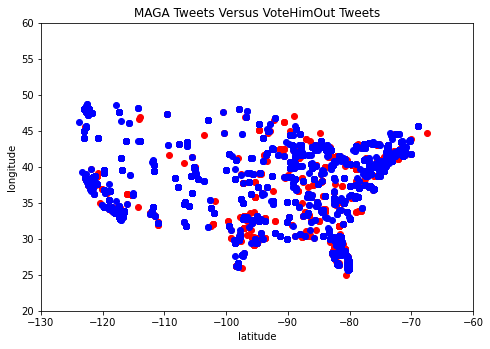

In [203]:
# red_latitude = red_df['lat']
# red_longitude = red_df['long']
# blue_latitude = blue_df['lat']
# blue_longitude = blue_df['long']
# fig=plt.figure()
# ax=fig.add_axes([0,0,1,1])
# ax.scatter(red_longitude, red_latitude, color='r')
# ax.set_xlim([-130, -60])
# ax.set_ylim([20, 60])
# ax.scatter(blue_longitude, blue_latitude, color='b')
# ax.set_xlabel('latitude')
# ax.set_ylabel('longitude')
# ax.set_title('MAGA Tweets Versus VoteHimOut Tweets')
# plt.show()

In [204]:
# import cartopy.crs as ccrs
# # from mpl_toolkits.basemap import Basemap
# # from sklearn.datasets.species_distributions import construct_grids

# # xgrid, ygrid = construct_grids(data)

# x = [1,2,3,4,5,180]
# y = [1,3,5,7,90]
# # plot coastlines with basemap
# m = ccrs(projection='cyl', resolution='c',
#             llcrnrlat=1, urcrnrlat=90,
#             llcrnrlon=1, urcrnrlon=180)
# m.drawmapboundary(fill_color='#DDEEFF')
# m.fillcontinents(color='#FFEEDD')
# m.drawcoastlines(color='gray', zorder=2)
# m.drawcountries(color='gray', zorder=2)

# # plot locations
# m.scatter(latlon[:, 1], latlon[:, 0], zorder=3,
#           c=species, cmap='rainbow', latlon=True);

TypeError: 'module' object is not callable

C:\Users\15037\anaconda3\envs\PythonData\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


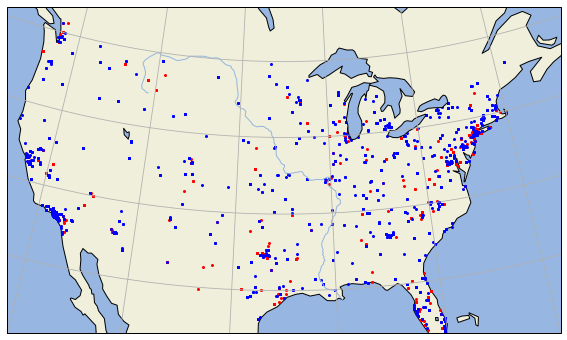

In [70]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)
ax.gridlines()

# modify the plot by adding a scatterplot over the map
plt.scatter(
    x=against_biden["long"],
    y=against_biden["lat"],
    color="red",
    s=4,
    alpha=1,
    transform=ccrs.PlateCarree()
)

plt.scatter(
    x=for_biden["long"],
    y=for_biden["lat"],
    color="blue",
    s=4,
    alpha=1,
    transform=ccrs.PlateCarree()
)

In [13]:
from sklearn.neighbors import KernelDensity

# Set up the data grid for the contour plot
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()
xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = np.radians(xy[land_mask])

# construct a spherical kernel density estimate of the distribution
kde = KernelDensity(bandwidth=0.03, metric='haversine')
kde.fit(np.radians([[1,2],[1,2]]))



NameError: name 'xgrid' is not defined

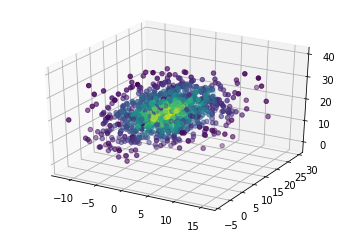

In [616]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mu=np.array([1,10,20])
sigma=np.matrix([[20,10,10],
                 [10,25,1],
                 [10,1,50]])
data=np.random.multivariate_normal(mu,sigma,1000)
values = data.T

kde = stats.gaussian_kde(values)
density = kde(values)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = values
ax.scatter(x, y, z, c=density)
plt.show()

In [162]:
a = ["a", "b", "c", "d", "e"]
print(a.index("c"))
count = [1,2,1]
count[0] = count[0] + 1

2


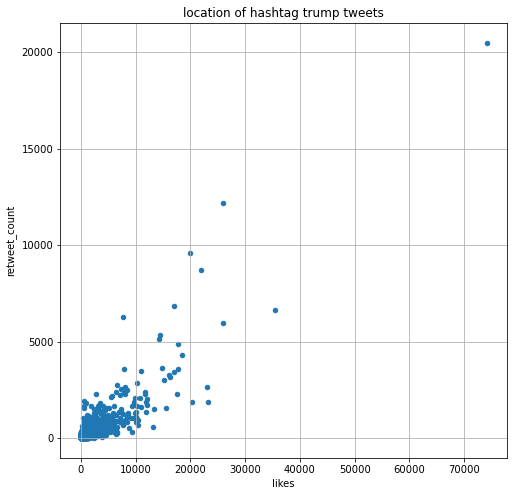

In [157]:
test = trump_data_df.plot(kind="scatter", x="likes", y="retweet_count", grid=True, figsize=(8,8),
              title="location of hashtag trump tweets")

In [82]:
trump_data_df.isnull().values.sum()

3938925

In [83]:
trump_null= trump_data_df[trump_data_df.isna().any(axis=1)]
trump_null

,created_at,tweet,likes,retweet_count,source,user_location,lat,long,city,state,state_code,country
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,Florida,FL,United States of America
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,Twitter for Android,"Perris,California",33.782519,-117.228648,NaN,California,CA,United States of America
6,2020-10-15 00:00:17,@richardmarx Glad u got out of the house! DICK...,0.0,0.0,Twitter for iPhone,"Powell, TN",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
970914,2020-11-08 23:59:43,@PelleX @Mikerger @spiegelbilderz_ @BertiFranz...,0.0,0.0,Twitter Web App,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970915,2020-11-08 23:59:48,JOE BIDEN WHY JOE BIDEN DID WINNED ?? TRUMP TR...,4.0,0.0,Twitter Web App,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970916,2020-11-08 23:59:53,#AfD|ler reagieren panisch bis hysterisch auf ...,25.0,4.0,Twitter Web App,Saxony/GER,NaN,NaN,NaN,NaN,NaN,NaN
970917,2020-11-08 23:59:54,"@sammelbis1998 @iheartmindy @bnorthg First, yo...",0.0,0.0,Twitter for iPad,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
def isNaN(num):
    return num != num

trump_data_df.loc[:,['lat', 'long'].fillna(91)

SyntaxError: unexpected EOF while parsing (<ipython-input-85-0c71e2caf8cf>, line 4)

In [71]:
columns = ['created_at', 'tweet', 'likes', 'retweet_count', 'source','user_location', 'lat', 'long', 'city','state','state_code','country']

for row in range(len(trump_data_df)):
     for col in columns:
        num = trump_data_df.loc[row,col]
        if isNaN(num) == 1:
            trump_data_df.at[row,col] = 0

In [72]:
trump_data_df.head()

,created_at,tweet,likes,retweet_count,source,user_location,lat,long,city,state,state_code,country
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,0,Florida,FL,United States of America
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,0,0.000000,0.000000,0,0,0,0
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,Portland,45.520247,-122.674195,Portland,Oregon,OR,United States of America
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,0,0.000000,0.000000,0,0,0,0
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,Washington DC,38.894992,-77.036558,Washington,District of Columbia,DC,United States of America


In [ ]:
all_dfs = [df1, 
pd.concat(all_dfs).reset_index(drop=True)